## Make JSON

For Model Training workflow, this is Step 4.

In [1]:
import os
import json

In [2]:
root = r'root_dir'
train_images_dir = os.path.join(root, 'train', 'images')
test_images_dir = os.path.join(root, 'test', 'images')
output_dir = r'set_this_to_CSRNet_root__model_looks_in_root'

In [3]:
# Get all the data together, similar function we've seen before
def gather_data(images_dir):
    data = []
    for img_name in os.listdir(images_dir):
        if img_name.endswith(".png"):
            img_path = os.path.join(images_dir, img_name)
            if "hr" in img_path:
                h5_path = img_path.replace("hr.png", ".h5").replace("images", "ground_truth")
            else:
                h5_path = img_path.replace(".png", ".h5").replace("images", "ground_truth")
            
            if os.path.exists(h5_path):
                data.append({"image": img_path, "ground_truth": h5_path})
    return data

In [4]:
# Runs above code to make a list of all image and .h5 file paths
train_data = gather_data(train_images_dir)
test_data = gather_data(test_images_dir)

# Save JSON files in the same folder as model! See above!
train_json_path = os.path.join(output_dir, "train.json")
test_json_path = os.path.join(output_dir, "test.json")

In [5]:
# Create both files
with open(train_json_path, "w") as train_file:
    json.dump(train_data, train_file, indent=4)

with open(test_json_path, "w") as test_file:
    json.dump(test_data, test_file, indent=4)

# Sanity check, you should see a number you roughly expect to see
print(f"Generated {train_json_path} with {len(train_data)} entries")
print(f"Generated {test_json_path} with {len(test_data)} entries")

Generated D:\AI\CSRNet\CSRNet-pytorch\train.json with 1670 entries
Generated D:\AI\CSRNet\CSRNet-pytorch\test.json with 417 entries


## Training the Model

The Read Me says to use command ```python train.py train.json val.json 0 0``` to start training process. Rightly or wrongly I have treated validation as test.

1. Make sure you are in ```CSRNet-pytorch``` folder, open command line.
2. Type ```python train.py train.json test.json 0 0```

The model is set to run for _400 epochs_ , meaning if you want to train your own checkpoint, be sure you have nothing else running and don't need your PC for a day.

To change this, open ```train.py``` and modify the value:

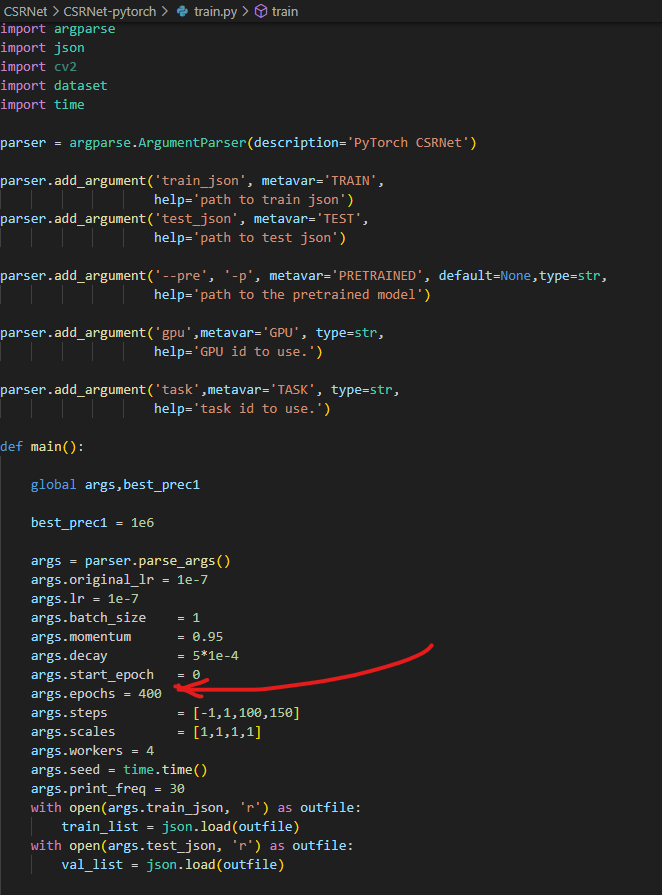